In [236]:
from ast import literal_eval

RESULTS_PATH = "drive/MyDrive/GRL_Mini_Project/results_uniform.txt"

with open(RESULTS_PATH, "r") as f:
  raw = f.readlines()


for i in range(len(raw)):
  raw[i] = raw[i].replace("Sigmoid()", "''").replace("Tanh()", "''").replace("ReLU()", "''")
  raw[i] = raw[i].replace("'ER", "'ER'").replace("'ER''", "'ER'").replace("'>'", "'")

print(len(raw))
# literal_eval("\n".join(raw))

161


In [237]:
tests = []
for i in range((len(raw)+5) // 6):
  model_params = literal_eval(raw[i*6+1])
  data_params = literal_eval(raw[i*6+2])
  res = literal_eval(raw[i*6+3])
  tests.append((model_params, data_params, res))

In [238]:
tests[0]

({'model_name': 'GCN',
  'num_models': 10,
  'num_features': 10,
  'gcn_channels': (10, 10),
  'num_gcn_layers': 1,
  'gcn_act': '<bound method Function.apply of <class __main__.ClippedReLU>>',
  'gcn_name': 'clipped_relu',
  'pooling': '<function global_mean_pool at 0x7dc2b3b5f400>',
  'pooling_name': 'mean',
  'mlp_channels': (10, 1),
  'num_mlp_layers': 2,
  'mlp_act': '',
  'mlp_name': 'tanh',
  'final_act': '',
  'final_name': 'sigmoid'},
 {'mode': 'ER',
  'nums_nodes': [10, 50, 100, 500, 1000, 5000],
  'subtypes': ['regular', 'sparse', 'very_sparse'],
  'num_graphs': 32},
 [{(10, 'regular'): 0.0,
   (10, 'sparse'): 0.0,
   (10, 'very_sparse'): 0.0,
   (50, 'regular'): 0.0,
   (50, 'sparse'): 0.0,
   (50, 'very_sparse'): 0.0,
   (100, 'regular'): 0.0,
   (100, 'sparse'): 0.0,
   (100, 'very_sparse'): 0.0,
   (500, 'regular'): 0.0,
   (500, 'sparse'): 0.0,
   (500, 'very_sparse'): 0.0,
   (1000, 'regular'): 0.0,
   (1000, 'sparse'): 0.0,
   (1000, 'very_sparse'): 0.0,
   (5000, 're

In [239]:
# data type and subtype; model layers activation and pooling; each with 10 models and all num_nodes

parsed_tests = {}
for test in tests:
  model_params, data_params, res = test
  data_type = data_params["mode"]
  data_subtypes = data_params["subtypes"]
  model_layers = model_params["num_gcn_layers"]
  model_act = model_params["gcn_name"]
  model_pooling = model_params["pooling_name"]

  parsed_test = {}
  for subtype in data_subtypes:
    parsed_test = [[] for _ in range(len(res))]
    for num_nodes in data_params["nums_nodes"]:
      for i in range(len(res)):
        parsed_test[i].append(res[i][(num_nodes, subtype)])

    parsed_tests[(model_layers, model_act, model_pooling, data_type, subtype)] = parsed_test

print(len(parsed_tests))
print(model_layers, model_act, model_pooling, data_type, subtype)
parsed_test

90
1 relu mean ER very_sparse


[[1.0, 1.0, 1.0, 1.0, 1.0, 1.0],
 [0.0625, 0.0, 0.0, 0.0, 0.0, 0.0],
 [1.0, 1.0, 1.0, 1.0, 1.0, 1.0],
 [1.0, 1.0, 1.0, 1.0, 1.0, 1.0],
 [0.0, 0.0, 0.0, 0.0, 0.0, 0.0],
 [0.0, 0.0, 0.0, 0.0, 0.0, 0.0],
 [0.0, 0.0, 0.0, 0.0, 0.0, 0.0],
 [0.0, 0.0, 0.0, 0.0, 0.0, 0.0],
 [0.03125, 0.0, 0.0, 0.0, 0.0, 0.0],
 [0.28125, 0.53125, 0.40625, 0.65625, 0.625, 0.875]]

<ipython-input-240-49353ff7cf95>:8: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels([0, 10, 50, 100, 500, 1000, 5000])


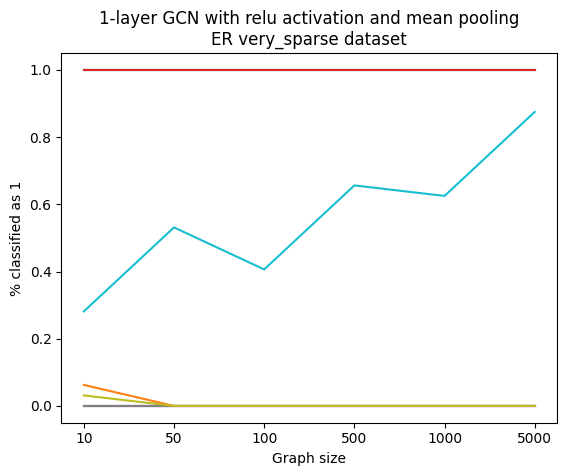

In [240]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots()

for i in range(len(parsed_test)):
  ax.plot(parsed_test[i])

ax.set_xticklabels([0, 10, 50, 100, 500, 1000, 5000])
ax.set_title(f"{model_layers}-layer GCN with {model_act} activation and {model_pooling} pooling\n{data_type} {subtype} dataset")
ax.set_xlabel("Graph size")
ax.set_ylabel("% classified as 1")

plt.show()

<ipython-input-242-6a148d2605fe>:18: UserWarning: FixedFormatter should only be used together with FixedLocator
  axs[idx1, idx2].set_xticklabels([0, 10, 50, 100, 500, 1000, 5000])


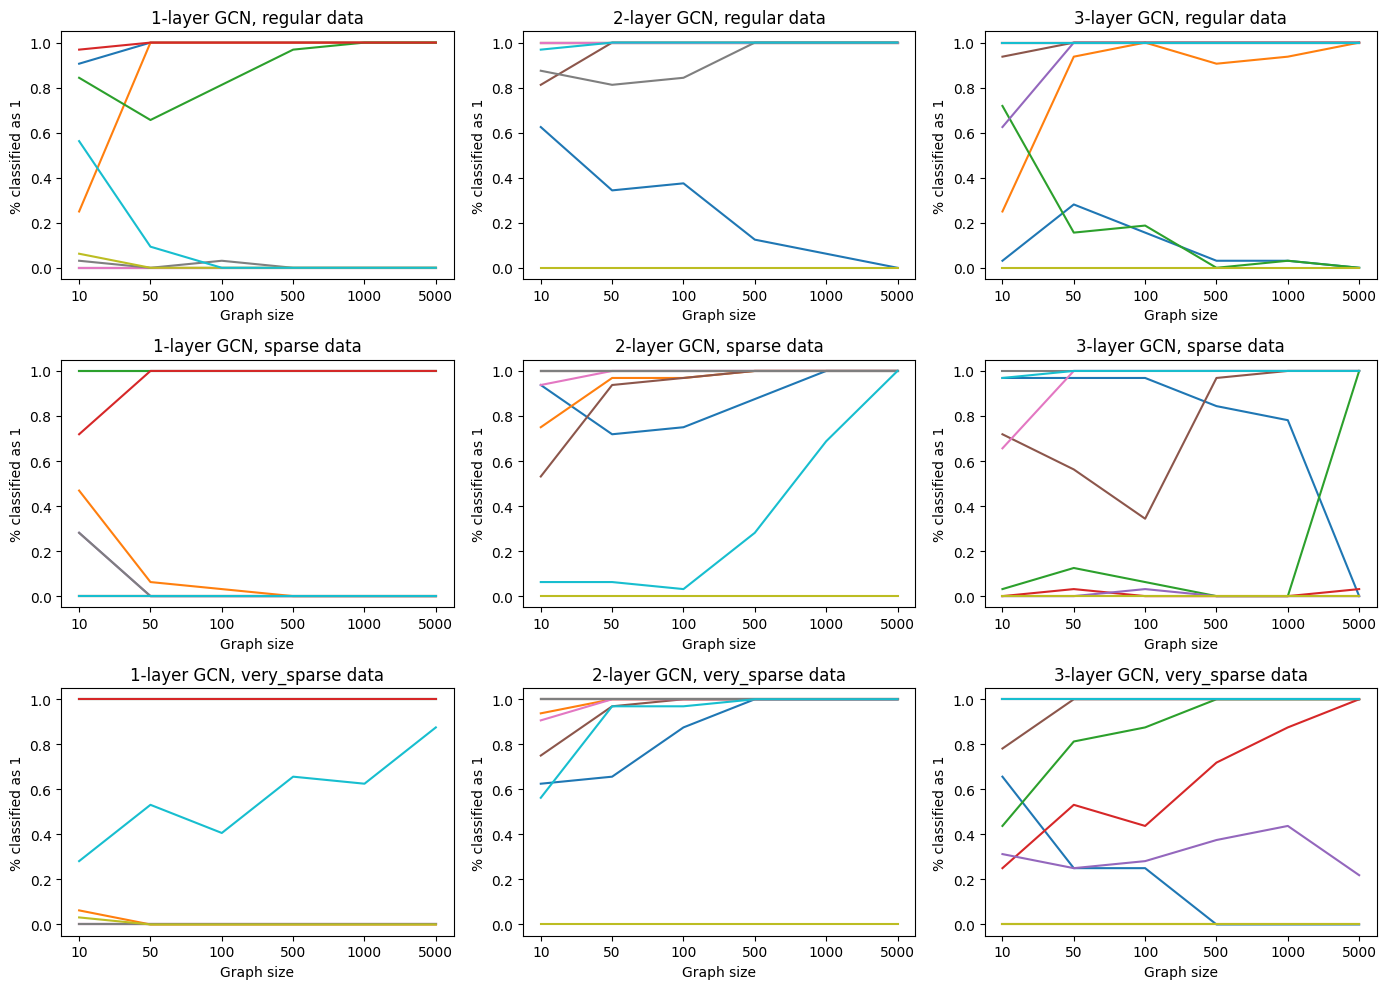

In [242]:
# data type and subtype; model layers activation and pooling; each with 10 models and all num_nodes

data_type = "ER"
# data_subtype = "dense"
model_act = "relu"
model_pooling = "mean"

fig, axs = plt.subplots(3, 3, figsize=(14, 10))

# for idx1, data_subtype in enumerate(["dense", "sparse", "very sparse"]):
for idx1, data_subtype in enumerate(["regular", "sparse", "very_sparse"]):
  for idx2, model_layers in enumerate([1, 2, 3]):
    parsed_test = parsed_tests[(model_layers, model_act, model_pooling, data_type, data_subtype)]

    for i in range(len(parsed_test)):
      axs[idx1, idx2].plot(parsed_test[i])

    axs[idx1, idx2].set_xticklabels([0, 10, 50, 100, 500, 1000, 5000])
    axs[idx1, idx2].set_title(f"{model_layers}-layer GCN, {data_subtype} data")
    axs[idx1, idx2].set_xlabel("Graph size")
    axs[idx1, idx2].set_ylabel("% classified as 1")

# plt.suptitle(f"Behaviour of GCN with {model_act} activation and {model_pooling} pooling\n{data_type} dataset")#, y=1.05)
plt.tight_layout()
plt.show()

<ipython-input-216-5a279a380423>:17: UserWarning: FixedFormatter should only be used together with FixedLocator
  axs[idx1, idx2].set_xticklabels([0, 10, 50, 100, 500, 1000, 5000])


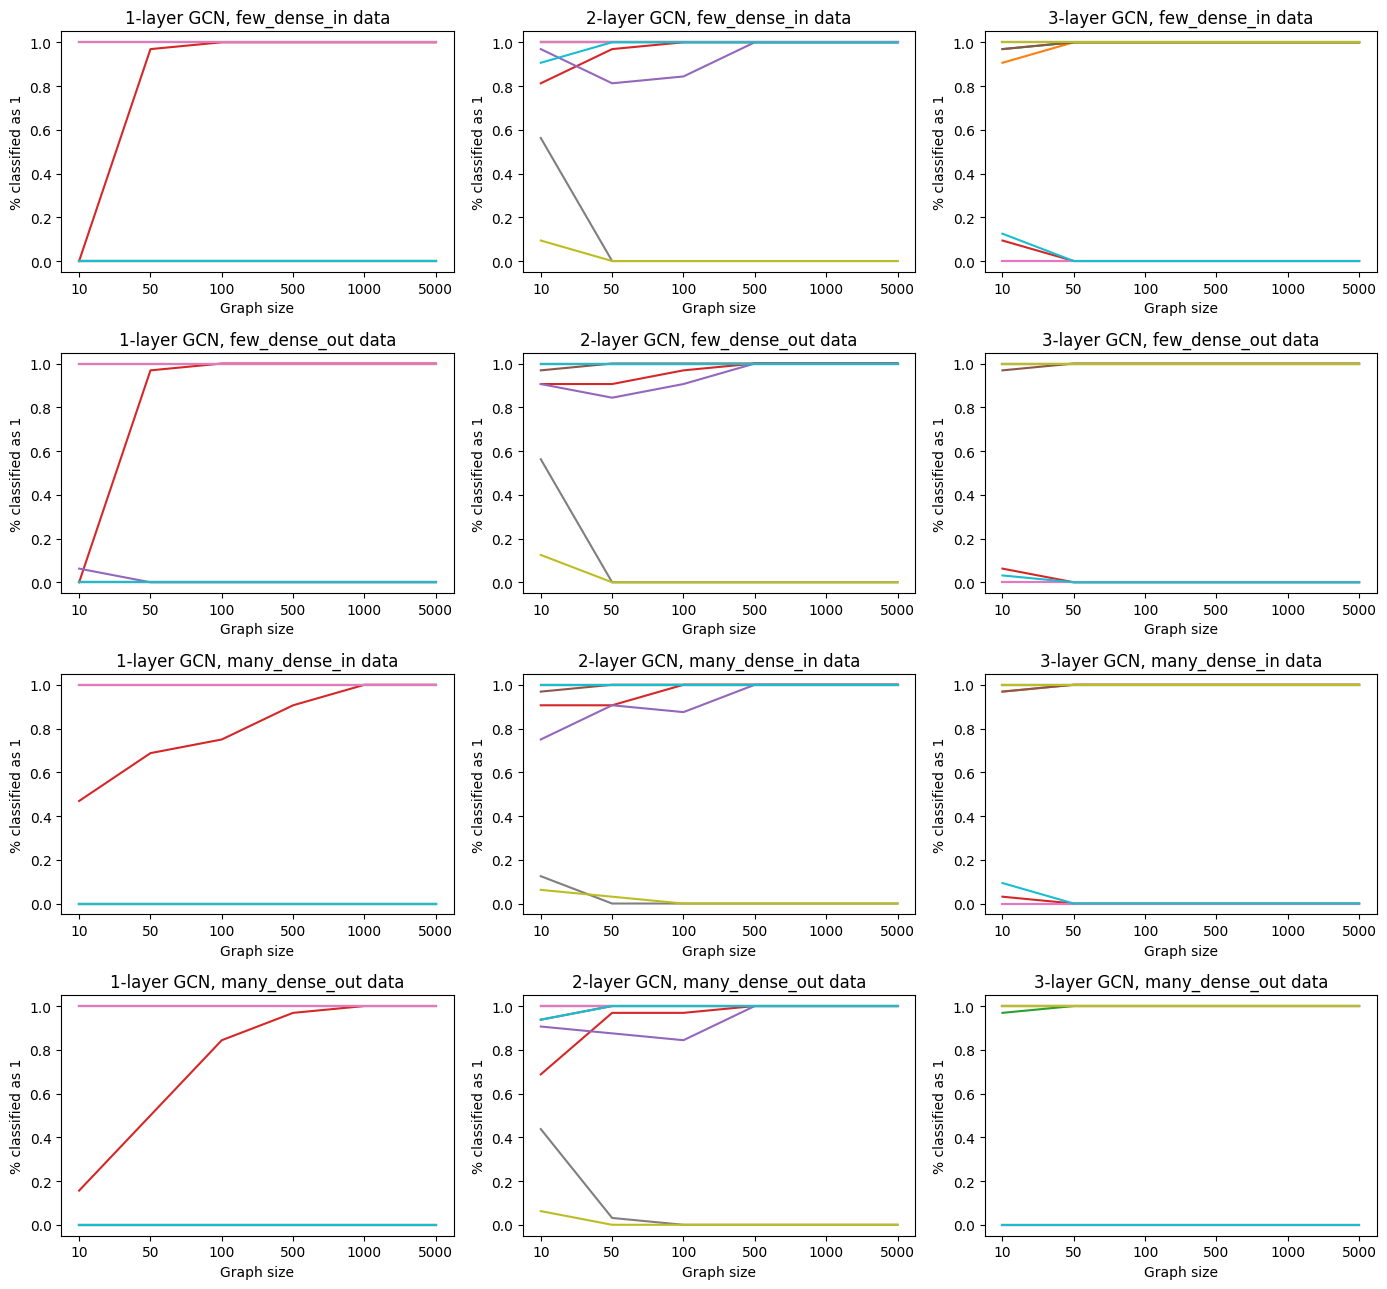

In [216]:
# data type and subtype; model layers activation and pooling; each with 10 models and all num_nodes

data_type = "SBM"
# data_subtype = "dense"
model_act = "clipped_relu"
model_pooling = "mean"

fig, axs = plt.subplots(4, 3, figsize=(14, 13))

for idx1, data_subtype in enumerate(["few_dense_in", "few_dense_out", "many_dense_in", "many_dense_out"]):
  for idx2, model_layers in enumerate([1, 2, 3]):
    parsed_test = parsed_tests[(model_layers, model_act, model_pooling, data_type, data_subtype)]

    for i in range(len(parsed_test)):
      axs[idx1, idx2].plot(parsed_test[i])

    axs[idx1, idx2].set_xticklabels([0, 10, 50, 100, 500, 1000, 5000])
    axs[idx1, idx2].set_title(f"{model_layers}-layer GCN, {data_subtype} data")
    axs[idx1, idx2].set_xlabel("Graph size")
    axs[idx1, idx2].set_ylabel("% classified as 1")

# plt.suptitle(f"Behaviour of GCN with {model_act} activation and {model_pooling} pooling\n{data_type} dataset")#, y=1.05)
plt.tight_layout()
plt.show()

# TODO relu_mean_er, clipped_mean_ba, clipped_mean_er

<ipython-input-261-b577dc72f1a3>:10: UserWarning: FixedFormatter should only be used together with FixedLocator
  axs[0].set_xticklabels([0, 10, 50, 100, 500, 1000, 5000])
<ipython-input-261-b577dc72f1a3>:18: UserWarning: FixedFormatter should only be used together with FixedLocator
  axs[1].set_xticklabels([0, 10, 50, 100, 500, 1000, 5000])
<ipython-input-261-b577dc72f1a3>:26: UserWarning: FixedFormatter should only be used together with FixedLocator
  axs[2].set_xticklabels([0, 10, 50, 100, 500, 1000, 5000])


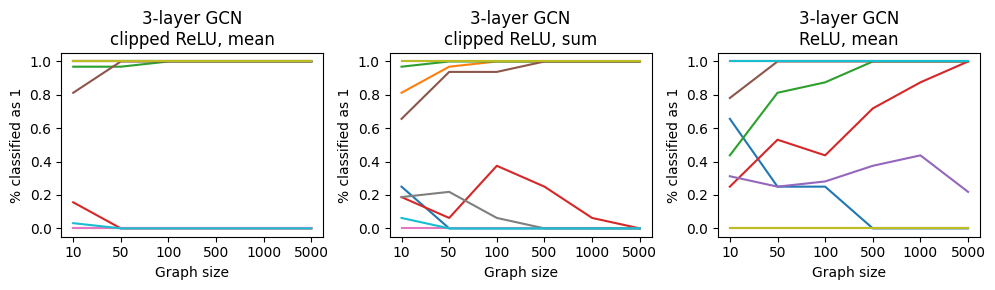

In [261]:
# data type and subtype; model layers activation and pooling; each with 10 models and all num_nodes



fig, axs = plt.subplots(1, 3, figsize=(10, 3))

parsed_test = parsed_tests[(3, "clipped_relu", "mean", "ER", "very_sparse")]
for i in range(len(parsed_test)):
  axs[0].plot(parsed_test[i])
axs[0].set_xticklabels([0, 10, 50, 100, 500, 1000, 5000])
axs[0].set_title(f"3-layer GCN\nclipped ReLU, mean")
axs[0].set_xlabel("Graph size")
axs[0].set_ylabel("% classified as 1")

parsed_test = parsed_tests[(3, "clipped_relu", "sum", "ER", "very_sparse")]
for i in range(len(parsed_test)):
  axs[1].plot(parsed_test[i])
axs[1].set_xticklabels([0, 10, 50, 100, 500, 1000, 5000])
axs[1].set_title(f"3-layer GCN\nclipped ReLU, sum")
axs[1].set_xlabel("Graph size")
axs[1].set_ylabel("% classified as 1")

parsed_test = parsed_tests[(3, "relu", "mean", "ER", "very_sparse")]
for i in range(len(parsed_test)):
  axs[2].plot(parsed_test[i])
axs[2].set_xticklabels([0, 10, 50, 100, 500, 1000, 5000])
axs[2].set_title(f"3-layer GCN\nReLU, mean")
axs[2].set_xlabel("Graph size")
axs[2].set_ylabel("% classified as 1")

plt.tight_layout()
plt.show()